# Como siempre primero importamos las librerias

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### leemos el CSV

In [22]:
df = pd.read_csv("titanic.csv")

# vemos que contiene y miramos que informacion podemos ver

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


como podemos ver hay nombres, sexo, ticket, cabina y si fue enbarcado. esos datos no pueden ser categorizados actualmente

## como trabajaremos con categorias, esas columnas nos serviran 

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### dividiremos el Dataframe en uno auxiliar para no afectar al original

In [23]:
df_limpia = df.drop(['Cabin','Embarked','Name','Ticket'], axis=1)

In [15]:
df_limpia.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

### miramos cuantos valores hay en las columnas para hacer un mapeo, mas de 10 valores no nos sirve en el Dataframe

In [17]:
df_limpia.Sex.unique()

array(['male', 'female'], dtype=object)

In [294]:
df_limpia.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [24]:
df_limpia.Sex = df_limpia.Sex.map({'male' : 1, 'female' : 2})

In [25]:
df_limpia

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,2,38.0,1,0,71.2833
2,3,1,3,2,26.0,0,0,7.9250
3,4,1,1,2,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,2,19.0,0,0,30.0000
888,889,0,3,2,NaN,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [28]:
df_limpia.Age = df.Age.fillna(df_limpia['Age'].mean())

In [29]:
df_limpia.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,1.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,2.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
corr = round(df_limpia.corr(),4)
corr.style.background_gradient()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005000,-0.035100,-0.042900,0.033200,-0.057500,-0.001700,0.012700
Survived,-0.005000,1.000000,-0.338500,0.543400,-0.069800,-0.035300,0.081600,0.257300
Pclass,-0.035100,-0.338500,1.000000,-0.131900,-0.331300,0.083100,0.018400,-0.549500
Sex,-0.042900,0.543400,-0.131900,1.000000,-0.084200,0.114600,0.245500,0.182300
Age,0.033200,-0.069800,-0.331300,-0.084200,1.000000,-0.232600,-0.179200,0.091600
SibSp,-0.057500,-0.035300,0.083100,0.114600,-0.232600,1.000000,0.414800,0.159700
Parch,-0.001700,0.081600,0.018400,0.245500,-0.179200,0.414800,1.000000,0.216200
Fare,0.012700,0.257300,-0.549500,0.182300,0.091600,0.159700,0.216200,1.000000


### con este metodo podemos saver cuales son valores categoricos

<Axes: >

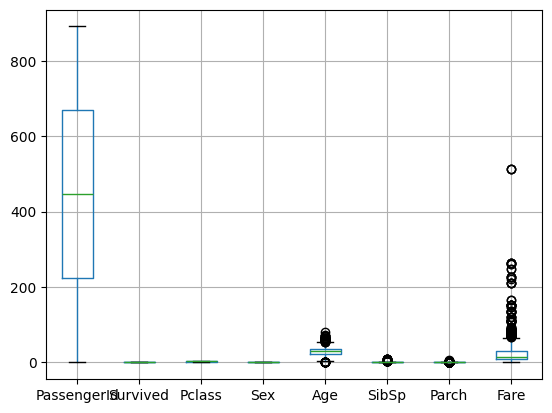

In [31]:
df_limpia.boxplot()

In [310]:
data_x = df_limpia.drop(['Survived','SibSp','Age','Parch'],axis=1)
data_y = df_limpia.Survived

In [311]:
data_x

,PassengerId,Pclass,Sex,Fare
0,1,3,1,7.2500
1,2,1,2,71.2833
2,3,3,2,7.9250
3,4,1,2,53.1000
4,5,3,1,8.0500
...,...,...,...,...
886,887,2,1,13.0000
887,888,1,2,30.0000
888,889,3,2,23.4500
889,890,1,1,30.0000


In [596]:
train_x, test_x, train_y,test_y = train_test_split(data_x,data_y,test_size=0.1)

In [597]:
k_neigbors = KNeighborsClassifier(n_neighbors=5)

In [598]:
k_neigbors.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=9)

In [599]:
y_predict = k_neigbors.predict(test_x)

In [600]:
print(f'Score: {round(k_neigbors.score(test_x,test_y),4)*100}%')

Score: 71.11%


In [601]:
result = ['murio','vivio']
genre = ['None','masculino','femenino']
classes = ['None','1era. Clase','2da. Clase','3era. Clase']
p_class = 1
sex = 1
age = 22
fare = 100

In [602]:
def classify_passengers(model,p_class,age,sex,fare):
    predicted = model.predict([[p_class,sex,age,fare]])
    return predicted

In [603]:
predicted = classify_passengers(k_neigbors,p_class,sex,age,fare)

c:\Users\M-80-1\Documents\Trabajos de Clase\AlgoritmicaAvanzada\RepositorioAlgoritmica\algoritmica-2023-2\pandas_intro\pandas_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [604]:
print(f'El pasajero de genero {genre[sex]}, de {age} años, que pago {fare} libras y esta en {classes[p_class]}: {result[predicted[0]]}' )

El pasajero de genero masculino, de 22 años, que pago 100 libras y esta en 1era. Clase: vivio
